In [1]:
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import TensorBoard
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime, os

import os
from tqdm import tqdm
import cv2

In [2]:
label_count = {'Human': 34999, 'Blank': 35000, 'Elephant_African': 34999, 'Hog_Red_River': 26069, 'Buffalo_African': 6459, 'Leopard_African': 2142, 'Monkey': 5038, 'Duiker_Blue': 35000, 'Duiker_Red': 34999, 'Porcupine_Brush_Tailed': 13694, 'Rodent': 1358, 'Squirrel': 11348, 'Rat_Giant': 34225, 'Guineafowl_Crested': 1513, 'Duiker_Yellow_Backed': 15436, 'Guineafowl_Black': 12054, 'Mongoose': 5518, 'Rail_Nkulengu': 3269, 'Chimpanzee': 5260, 'Mammal_Other': 0 ,'Bird': 6649, 'Genet': 3303, 'Gorilla': 1074, 'Pangolin': 872, 'Mongoose_Black_Footed': 1475, 'Mandrillus': 9305, 'Civet_African_Palm': 936, 'Chevrotain_Water': 4713, 'Cat_Golden': 406}

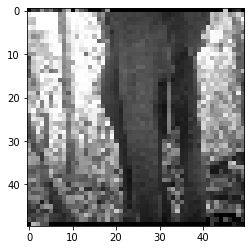

In [3]:
data = np.load("../Data/Data_Gabon/training_data_gabon.npy", allow_pickle=True)
plt.imshow(data[2][0], cmap="gray")
plt.show()

In [4]:
len(data)

347113

In [5]:
# Normalize pixel values to be between 0 and 1
for pictures in data:
    pictures[0] = pictures[0] / 255

In [6]:
# select 400 pictures of each class.
new_data = []
counter = {}
for picture in data:
    if picture[1] != 28 and picture[1] != 19:
        if picture[1] > 19:
            picture[1] -= 1
        if picture[1] in counter.keys():
            if counter[picture[1]] != 1000:
                new_data.append(picture)
                counter[picture[1]] += 1
            else:
                pass
        else:
            new_data.append(picture)
            counter[picture[1]] = 1
    else:
        pass
            
len(new_data)

25808

In [7]:
# get the labels
def get_labels(data):
    images, labels = [], []
    for items in data:
        images.append(items[0])
        labels.append(items[1])
    images = np.array(images)
    labels = np.array(labels)

    return images, labels

images, labels = get_labels(new_data)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [9]:
# reduce dimentions
X_train = tf.expand_dims(X_train, axis=-1)
X_test = tf.expand_dims(X_test, axis=-1)
X_val = tf.expand_dims(X_test, axis=-1)
y_train = tf.expand_dims(y_train, axis=-1)
y_test = tf.expand_dims(y_test, axis=-1)
y_val = tf.expand_dims(y_test, axis=-1)

In [10]:
# Load the TensorBoard notebook extension
# %load_ext tensorboard
%reload_ext tensorboard

In [16]:
# creating th model
model = models.Sequential()
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
# model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(27)) # <---- change ending layers!!!

model.summary()  # summary

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 48, 48, 128)       1280      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 22, 22, 128)       147584    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 9, 9, 128)         147584    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 2, 2, 128)        

In [17]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# With tensorboard
history = model.fit(X_train, y_train, epochs=10, batch_size = 32,
                    validation_data=(X_val, y_val), callbacks=[tensorboard_callback])

# With tensorboard
# history = model.fit(X_train, y_train, epochs=10, batch_size = 32,
#                     validation_split=0.2, callbacks=[tensorboard_callback])

Epoch 1/10
484/484 [==============================] - 70s 143ms/step - loss: 3.0034 - accuracy: 0.0937 - val_loss: 2.3319 - val_accuracy: 0.2530
Epoch 2/10
484/484 [==============================] - 64s 133ms/step - loss: 2.2611 - accuracy: 0.2635 - val_loss: 2.0829 - val_accuracy: 0.3193
Epoch 3/10
484/484 [==============================] - 67s 139ms/step - loss: 2.0806 - accuracy: 0.3179 - val_loss: 1.9948 - val_accuracy: 0.3475
Epoch 4/10
484/484 [==============================] - 69s 143ms/step - loss: 1.9208 - accuracy: 0.3603 - val_loss: 1.9036 - val_accuracy: 0.3627
Epoch 5/10
484/484 [==============================] - 67s 139ms/step - loss: 1.7795 - accuracy: 0.4052 - val_loss: 1.8034 - val_accuracy: 0.3818
Epoch 6/10
484/484 [==============================] - 67s 139ms/step - loss: 1.6749 - accuracy: 0.4436 - val_loss: 1.7149 - val_accuracy: 0.4318
Epoch 7/10
484/484 [==============================] - 66s 136ms/step - loss: 1.5766 - accuracy: 0.4668 - val_loss: 1.6464 - val_ac

In [14]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(test_acc)

861/861 [==============================] - 12s 14ms/step - loss: 0.2435 - accuracy: 0.9199
0.9198663234710693


In [18]:
# launch tensorboard
%tensorboard --logdir logs --host localhost
# %tensorboard --logdir logs 

# taskkil /im tensorboard.exe /f
# del /q %TMP%\.tensorboard-info\*

Reusing TensorBoard on port 6006 (pid 4136), started 0:15:42 ago. (Use '!kill 4136' to kill it.)

In [18]:
# score per class
Y_test = tf.reshape(y_test, [27529])
# Y_test = np.argmax(y_pred, axis=1) # Convert one-hot to index
y_pred = model.predict_classes(X_test)

print(classification_report(Y_test, y_pred))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      6932
           1       0.93      0.91      0.92      6955
           2       0.89      0.91      0.90      6992
           3       0.93      0.93      0.93      6650

    accuracy                           0.92     27529
   macro avg       0.92      0.92      0.92     27529
weighted avg       0.92      0.92      0.92     27529



In [ ]:
predictions = model.predict_on_batch(images)

In [ ]:
predictions[0]

# Test on myanmar data

In [44]:
myanmar_data = np.load("../Data/Data_Myanmar/testing_data_myanmar_for_gabon_model.npy", allow_pickle=True)

In [ ]:
pictures_myan = []
labels_myan = []

for picture_myan, label_myan in myanmar_data:
    pictures_myan.append(picture_myan)
    labels_myan.append(label_myan)

In [47]:
pictures_myan = np.array(pictures_myan)
labels_myan = np.array(labels_myan)

pictures_myan = tf.expand_dims(pictures_myan, axis=-1)
labels_myan = tf.expand_dims(labels_myan, axis=-1)

In [48]:
test_loss, test_acc = model.evaluate(pictures_myan, labels_myan, verbose=1)
print(test_acc)

92/92 [==============================] - 2s 18ms/step - loss: 328.0647 - accuracy: 0.4723
0.4723360538482666


In [51]:
# score per class
Y_test = tf.reshape(labels_myan, [2928])
# Y_test = np.argmax(y_pred, axis=1) # Convert one-hot to index
y_pred = model.predict_classes(pictures_myan)

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.54      0.65      2562
           1       0.00      0.00      0.00         0
           2       0.04      0.11      0.06        92
           3       0.01      0.00      0.00       274

    accuracy                           0.47      2928
   macro avg       0.22      0.16      0.18      2928
weighted avg       0.73      0.47      0.57      2928



C:\Users\Siebren\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Siebren\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Siebren\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
